In [24]:
import numpy as np
import h5py
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import os
import sklearn.preprocessing as prep



namee1 = '/home/mabbasloo/Documents/carCrashData/f001_S2000001_1.mat' 
namee2 = '/home/mabbasloo/Documents/carCrashData/f001_S2000002_1.mat' 
namee3 = '/home/mabbasloo/Documents/carCrashData/f001_S2000003_1.mat'
namee4 = '/home/mabbasloo/Documents/carCrashData/f001_S2000004_1.mat'

namee = [namee1, namee2, namee3, namee4]

name1 = '/home/mabbasloo/Documents/carCrashData/S2000001/data/'
name2 = '/home/mabbasloo/Documents/carCrashData/S2000002/data/'
name3 = '/home/mabbasloo/Documents/carCrashData/S2000003/data/'
name4 = '/home/mabbasloo/Documents/carCrashData/S2000004/data/'

name = [name1, name2, name3, name4]

files = ['1', '2', '3', '4']
DIMM = [1714, 1736, 1519, 1705]
P = len(DIMM)

In [25]:
DATAall = []
dataall = []
st = 20
stride = 3
d = 40
for p in range(P):
    filename = '/home/mabbasloo/Documents/carCrashData/200000' + files[p]
    with open(filename) as f:
        data = f.readlines() 
    data = [x.strip() for x in data]   
    data = sorted(data, key=lambda x:x[0:4])[0::stride]
    dataall.append(data)
    DATA = []
    hm = len(data)
    dimm = DIMM[p]
    db = h5py.File(namee[p], 'r')
    ds = db['Phi']
    ds = np.asarray(ds).astype(np.float32).T
    ds = ds[:, 0:d]
    ds[np.isnan(ds)] = 0.0
    ds[np.isinf(ds)] = 0.0
    for i in range(hm):
        db1 = h5py.File(name[p] + data[i], 'r')
        ds1 = db1['shape_xyz']
        ds1 = np.asarray(ds1).astype(np.float32)
        ds1[np.isnan(ds1)] = 0.0
        ds1[np.isinf(ds1)] = 0.0   
        if ds1.shape[1] == DIMM[p]:
            DATA.append(np.dot(ds1, ds))
        else:
            print (data[i])
    DATAall.append(DATA)   
print (len(DATAall), len(DATAall[0]), DATAall[0][0].shape) 

4 4100 (3, 40)


In [26]:
DATA = []
for i in range(len(DATAall[0])):
    dummy = np.zeros((3, d*P))
    for j in range(P):
        dummy[:, j*d:(j+1)*d] = DATAall[j][i]
    DATA.append(dummy)
print (len(DATA), DATA[0].shape)    

4100 (3, 160)


In [27]:
lx = np.linalg.norm(DATA[:][0][:])
ly = np.linalg.norm(DATA[:][1][:])
lz = np.linalg.norm(DATA[:][2][:])
for i in range(hm):
    DATA[i][0] = DATA[i][0]/lx
    DATA[i][1] = DATA[i][1]/ly
    DATA[i][2] = DATA[i][2]/lz 
    
#def standard_scale(X_train):
#    for i in range(len(X_train)):
#        X_train[i] = X_train[i]/np.linalg.norm(X_train[i], 'fro')
#    return X_train

#DATA = standard_scale(DATA)

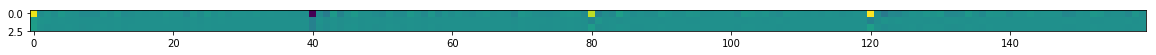

In [28]:
plt.figure(figsize=(20, 20)); plt.imshow(DATA[0])

Text(0.5, 0, 'z')

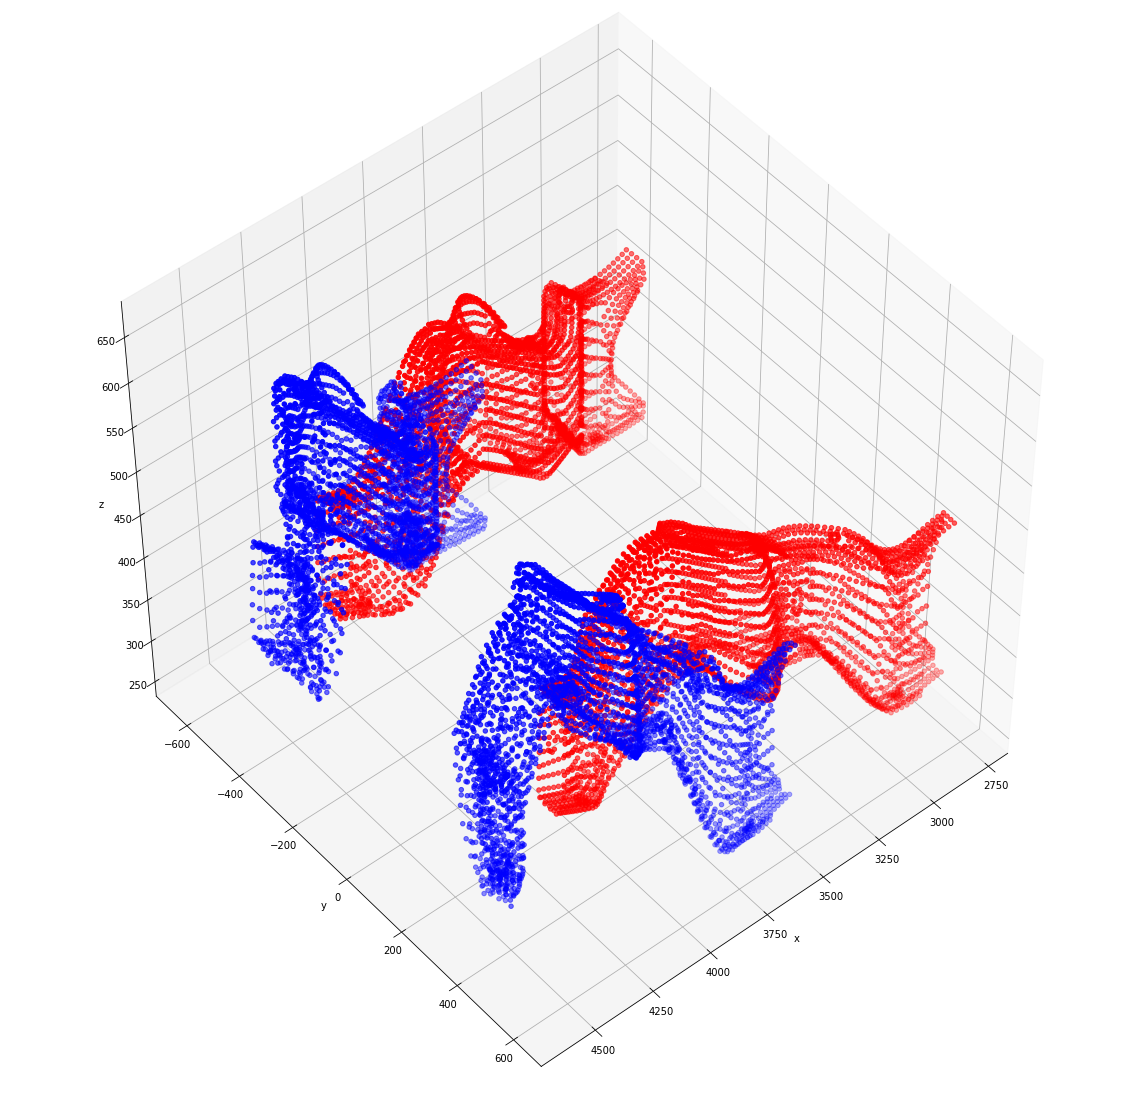

In [29]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
for p in range(P):
    db1 = h5py.File(name[p] + dataall[p][0], 'r')
    ds1 = db1['shape_xyz']
    ds1 = np.asarray(ds1).astype(np.float32)
    db2 = h5py.File(name[p] + dataall[p][st-1], 'r')
    ds2 = db2['shape_xyz']
    ds2 = np.asarray(ds2).astype(np.float32)    
    ax.scatter(ds1[0], ds1[1], ds1[2], c='r', marker='o')
    ax.scatter(ds2[0], ds2[1], ds2[2], c='b', marker='o')
ax.view_init(50, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

(3, 1714)
(3, 1736)
(3, 1519)
(3, 1705)


Text(0.5, 0, 'z')

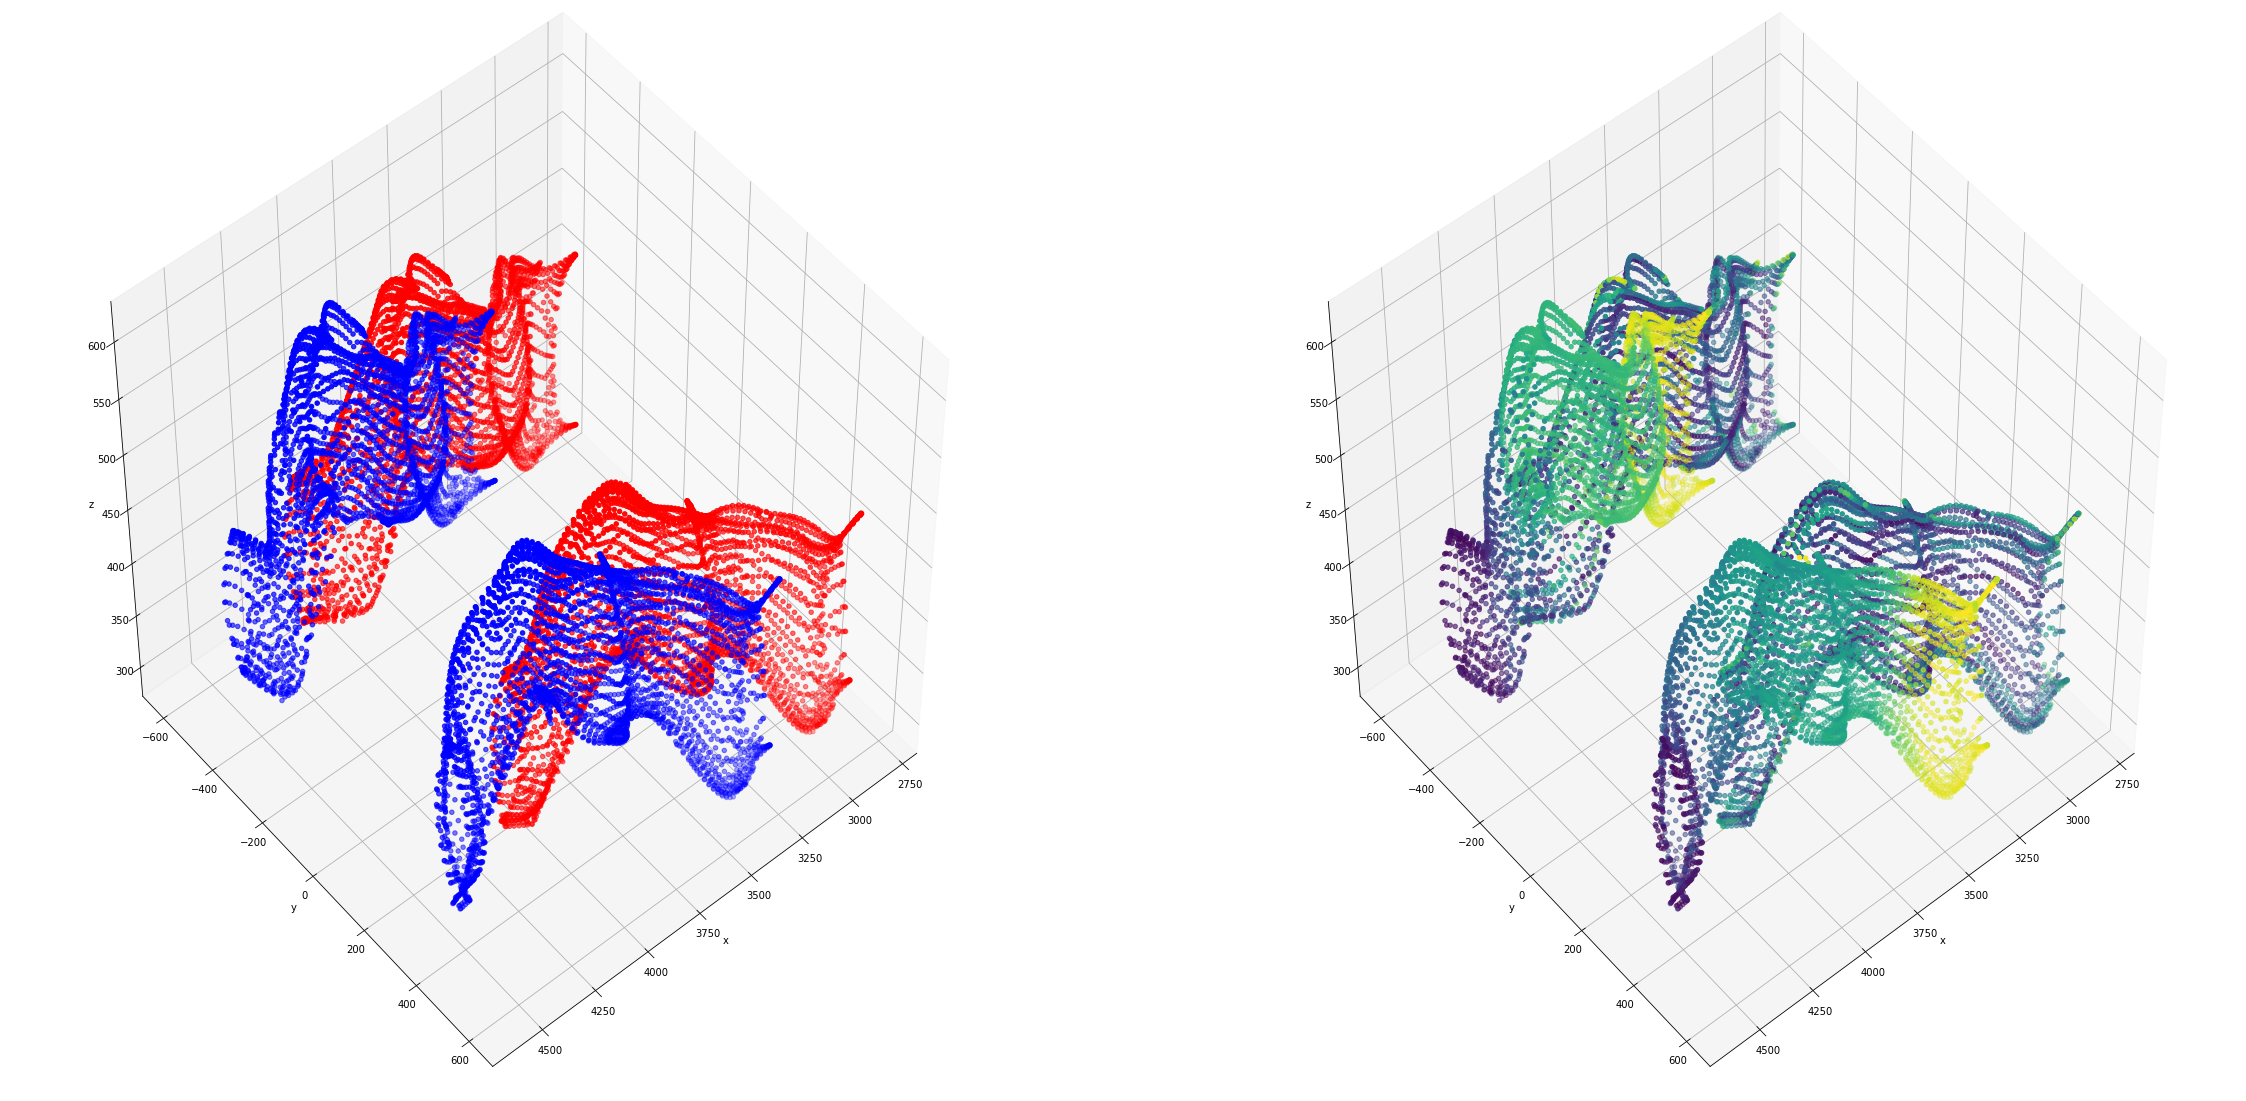

In [30]:
fig = plt.figure(figsize=(40, 20))
ax = fig.add_subplot(121, projection='3d')
axx = fig.add_subplot(122, projection='3d')
for p in range(P):
    db = h5py.File(namee[p], 'r')
    ds = db['Phi']
    ds = np.asarray(ds).astype(np.float32).T
    ds = ds[:, 0:d]
    ds[np.isnan(ds)] = 0.0
    ds[np.isinf(ds)] = 0.0
    db1 = h5py.File(name[p] + dataall[p][0], 'r')
    ds1 = db1['shape_xyz']
    ds1 = np.asarray(ds1).astype(np.float32)
    db2 = h5py.File(name[p] + dataall[p][st-1], 'r')
    ds2 = db2['shape_xyz']
    ds2 = np.asarray(ds2).astype(np.float32)     
    xyz1 = np.dot(DATAall[p][0], np.linalg.pinv(ds))
    xyz2 = np.dot(DATAall[p][9], np.linalg.pinv(ds))
    print (xyz1.shape)
    cl1 = np.linalg.norm(np.abs(xyz1 - ds1), axis=0)
    cl1 = (cl1-np.amin(cl1))/(np.amax(cl1)-np.amin(cl1))
    cl2 = np.linalg.norm(np.abs(xyz2 - ds2), axis=0)
    cl2 = (cl2-np.amin(cl2))/(np.amax(cl2)-np.amin(cl2))
    axx.scatter(xyz1[0], xyz1[1], xyz1[2], c=cl1, marker='o')
    axx.scatter(xyz2[0], xyz2[1], xyz2[2], c=cl2, marker='o')
    ax.scatter(xyz1[0], xyz1[1], xyz1[2], c='r', marker='o')
    ax.scatter(xyz2[0], xyz2[1], xyz2[2], c='b', marker='o')    
ax.view_init(50, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
axx.view_init(50, 50)
axx.set_xlabel('x')
axx.set_ylabel('y')
axx.set_zlabel('z')

In [31]:
dim = np.int(len(data)/st)
DATA3 = []
for i in range(dim):
    D = np.asarray(DATA[i*st:(i+1)*st]).reshape(st*3, P*d)
    DATA3.append(D)
print (len(DATA3), DATA3[0].shape)  
ddd = st*3
print (ddd, d)
dim3 = 100

205 (60, 160)
60 40


In [32]:
# lstm autoencoder reconstruct and predict sequence
from numpy import array
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model


# define input sequence
#[samples, timesteps, features]
seq_in = []
for j in range(dim3):
    seq_in.append(DATA3[j].reshape(st, 3*d*P))
seq_in = np.asarray(seq_in)  
print (seq_in.shape)

seq_test = []
for j in range(dim3, dim):
    seq_test.append(DATA3[j].reshape(st, 3*d*P))
seq_test = np.asarray(seq_test)  
print (seq_test.shape)

n_in = seq_in.shape[1]

# prepare output sequence
l = 5
seq_out = seq_in[:, l:, :]
n_out = n_in - l

# define encoder
visible = Input(shape=(n_in, 3*d*P))
encoder = LSTM(1000, activation='relu')(visible)

# define reconstruct decoder
decoder1 = RepeatVector(n_in)(encoder)
decoder1 = LSTM(1000, activation='relu', return_sequences=True)(decoder1)
decoder1 = TimeDistributed(Dense(3*d*P))(decoder1)

# define predict decoder
decoder2 = RepeatVector(n_out)(encoder)
decoder2 = LSTM(1500, activation='relu', return_sequences=True)(decoder2)
decoder2 = TimeDistributed(Dense(3*d*P))(decoder2)

# tie it together
model = Model(inputs=visible, outputs=[decoder1, decoder2])
model.compile(optimizer='adam', loss='mse')
plot_model(model, show_shapes=True, to_file='composite_lstm_autoencoder.png')

Using TensorFlow backend.


(100, 20, 480)
(105, 20, 480)


In [33]:
# fit model
model.fit(seq_in, [seq_in,seq_out], epochs=100, verbose=1)

Epoch 1/100
100/100 [==============================] - 12s 115ms/step - loss: 0.0044 - time_distributed_1_loss: 0.0022 - time_distributed_2_loss: 0.0022
Epoch 2/100
100/100 [==============================] - 6s 57ms/step - loss: 0.0013 - time_distributed_1_loss: 6.9016e-04 - time_distributed_2_loss: 6.3101e-04
Epoch 3/100
100/100 [==============================] - 6s 59ms/step - loss: 7.8793e-04 - time_distributed_1_loss: 3.4523e-04 - time_distributed_2_loss: 4.4269e-04
Epoch 4/100
100/100 [==============================] - 6s 58ms/step - loss: 3.8886e-04 - time_distributed_1_loss: 1.8897e-04 - time_distributed_2_loss: 1.9988e-04
Epoch 5/100
100/100 [==============================] - 6s 58ms/step - loss: 2.9175e-04 - time_distributed_1_loss: 1.3938e-04 - time_distributed_2_loss: 1.5237e-04
Epoch 6/100
100/100 [==============================] - 6s 59ms/step - loss: 2.2657e-04 - time_distributed_1_loss: 1.1218e-04 - time_distributed_2_loss: 1.1439e-04
Epoch 7/100
100/100 [===============

In [34]:
# demonstrate prediction
yhat = model.predict(seq_test, verbose=1)

print (len(yhat), yhat[0].shape)

105/105 [==============================] - 2s 15ms/step
2 (105, 20, 480)


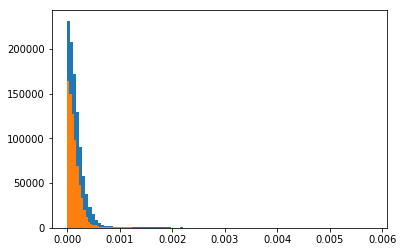

In [35]:
_,_,_ = plt.hist(np.abs(yhat[0] - seq_test).reshape(seq_test.shape[0]*seq_test.shape[1]*seq_test.shape[2]), bins=100)
_,_,_ = plt.hist(np.abs(yhat[1] - seq_test[:, l:, :]).reshape(seq_test.shape[0]*(seq_test.shape[1]-l)*seq_test.shape[2]), bins=100)

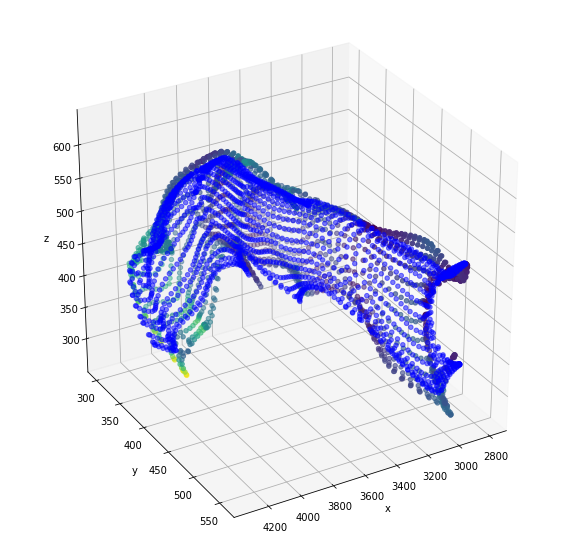

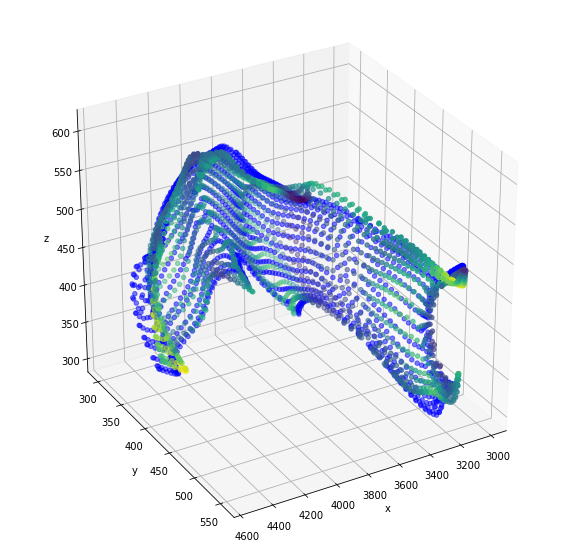

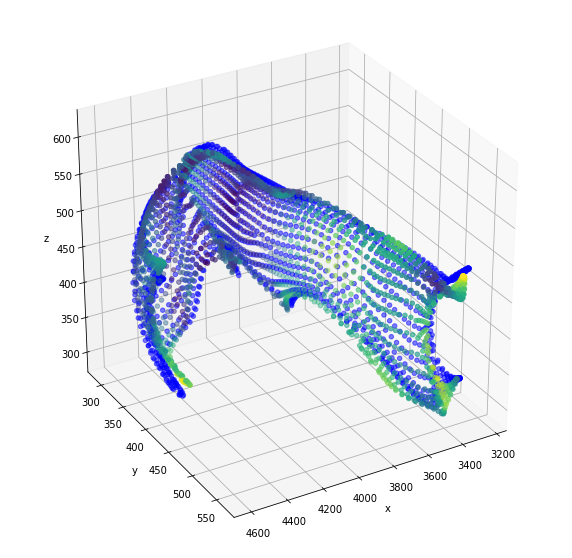

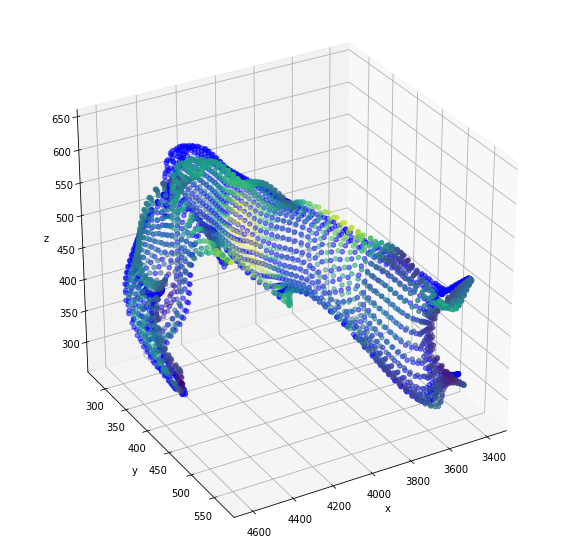

In [36]:
x_reconstructed3 = yhat[0].reshape(dim-dim3, st*3, d*P)
db = h5py.File(namee[0], 'r')
ds = db['Phi']
ds = np.asarray(ds).astype(np.float32).T
ds = ds[:, 0:d]
ds[np.isnan(ds)] = 0.0
ds[np.isinf(ds)] = 0.0
lxyz = np.array([[lx, 0, 0],
                 [0, ly, 0],
                 [0, 0, lz]])
for i in range(0, st, 5):
    xyz3 = np.dot(DATAall[0][dim3*st+i], np.linalg.pinv(ds))
    xyz_reconstructed3 = np.dot(np.dot(lxyz, x_reconstructed3[0, i*3:(i+1)*3, 0:d]), np.linalg.pinv(ds))
    cl = np.linalg.norm(np.abs(xyz3 - xyz_reconstructed3), axis=0)
    cl = (cl-np.amin(cl))/(np.amax(cl)-np.amin(cl))
    fig = plt.figure(figsize=(10, 10))
    c = ['b', 'r']
    m = ['o', 'o']
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xyz_reconstructed3[0], xyz_reconstructed3[1], xyz_reconstructed3[2], c=cl, marker=m[1])
    ax.scatter(xyz3[0], xyz3[1], xyz3[2], c=c[0], marker=m[0], alpha=0.5)
    ax.view_init(30, 60)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z') 

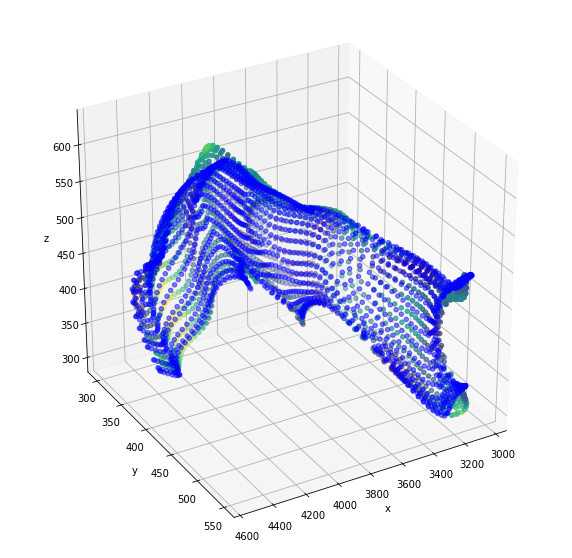

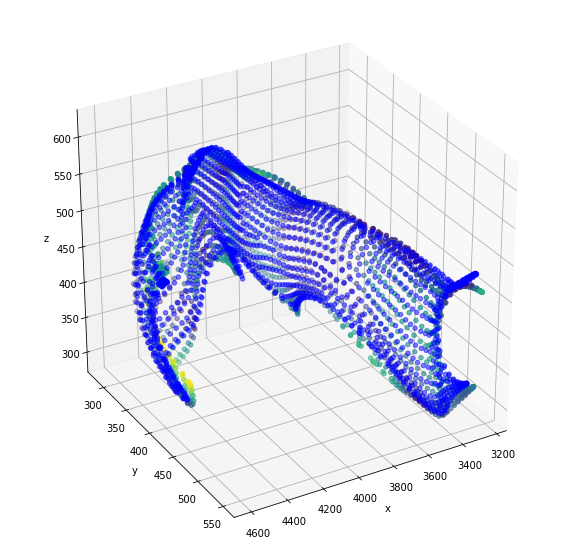

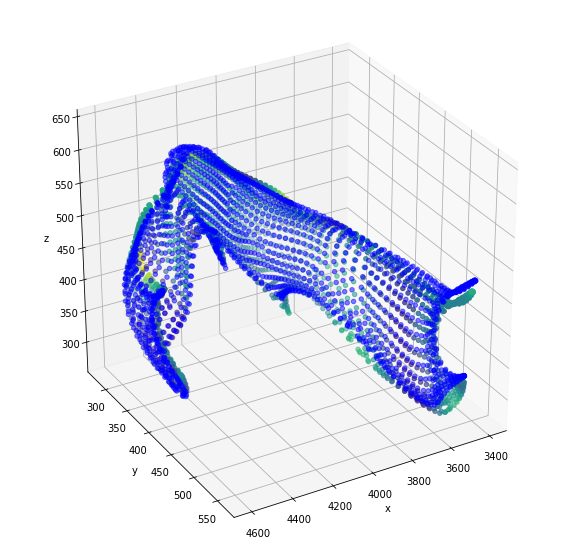

In [38]:
x_reconstructed3 = yhat[1].reshape(dim-dim3, (st-l)*3, d*P)
db = h5py.File(namee[0], 'r')
ds = db['Phi']
ds = np.asarray(ds).astype(np.float32).T
ds = ds[:, 0:d]
ds[np.isnan(ds)] = 0.0
ds[np.isinf(ds)] = 0.0
for i in range(l, st, 5):
    xyz3 = np.dot(DATAall[0][dim3*st+i], np.linalg.pinv(ds))
    xyz_reconstructed3 = np.dot(np.dot(lxyz, x_reconstructed3[0, (i-l)*3:(i-l+1)*3, 0:d]), np.linalg.pinv(ds))
    cl = np.linalg.norm(np.abs(xyz3 - xyz_reconstructed3), axis=0)
    cl = (cl-np.amin(cl))/(np.amax(cl)-np.amin(cl))
    fig = plt.figure(figsize=(10, 10))
    c = ['b', 'r']
    m = ['o', 'o']
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xyz3[0], xyz3[1], xyz3[2], c=c[0], marker=m[0], alpha=0.5)
    ax.scatter(xyz_reconstructed3[0], xyz_reconstructed3[1], xyz_reconstructed3[2], c=cl, marker=m[1])
    ax.view_init(30, 60)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

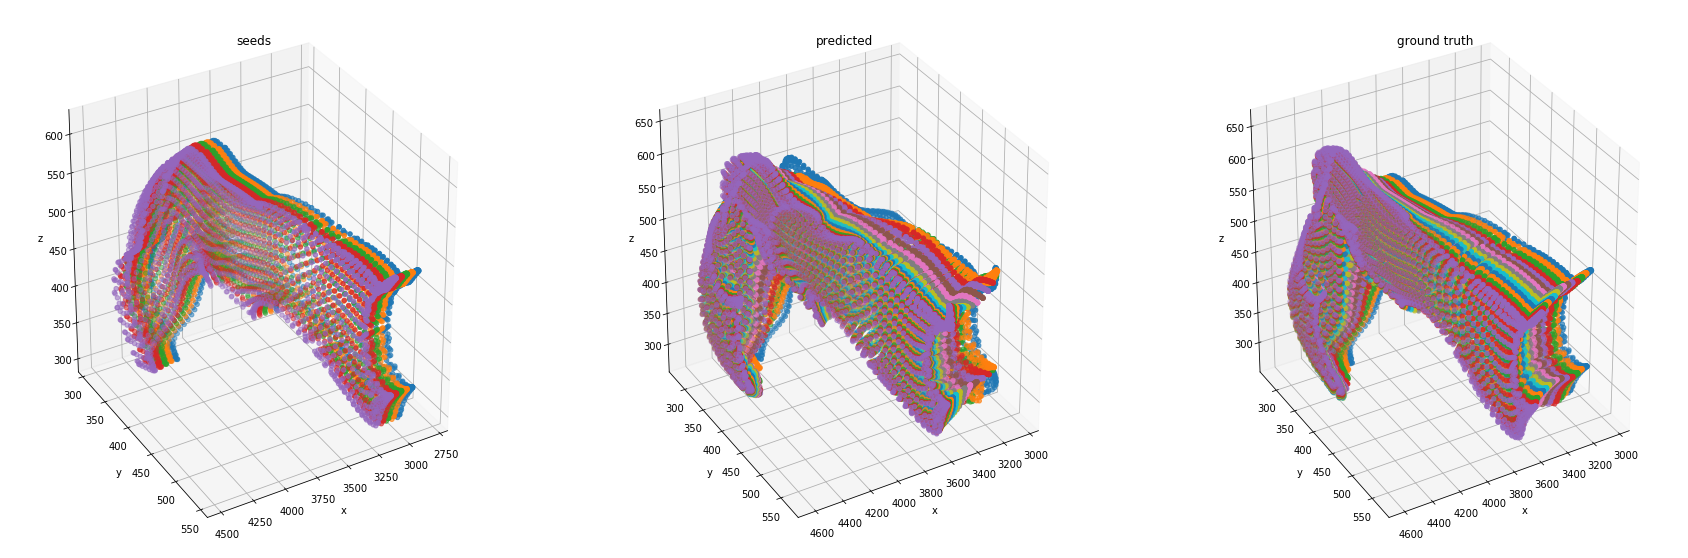

In [39]:
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(131, projection='3d')
axx = fig.add_subplot(132, projection='3d')
axxx = fig.add_subplot(133, projection='3d')
ax.set_title('seeds')
axx.set_title('predicted')
axxx.set_title('ground truth')
    
x_reconstructed3 = yhat[1].reshape(dim-dim3, (st-l)*3, d*P)     
db = h5py.File(namee[0], 'r')
ds = db['Phi']
ds = np.asarray(ds).astype(np.float32).T
ds = ds[:, 0:d]
ds[np.isnan(ds)] = 0.0
ds[np.isinf(ds)] = 0.0

for i in range(0, l):
    xyz3 = np.dot(DATAall[0][dim3*st+i], np.linalg.pinv(ds))
    ax.scatter(xyz3[0], xyz3[1], xyz3[2])
    ax.view_init(30, 60)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')  

for i in range(l, st, 1):
    xyz_reconstructed3 = np.dot(np.dot(lxyz, x_reconstructed3[0, (i-l)*3:(i-l+1)*3, 0:d]), np.linalg.pinv(ds))   
    axx.scatter(xyz_reconstructed3[0], xyz_reconstructed3[1], xyz_reconstructed3[2])
    axx.view_init(30, 60)
    axx.set_xlabel('x')
    axx.set_ylabel('y')
    axx.set_zlabel('z')

for i in range(l, st, 1):
    xyz3 = np.dot(DATAall[0][dim3*st+i], np.linalg.pinv(ds))
    axxx.scatter(xyz3[0], xyz3[1], xyz3[2])
    axxx.view_init(30, 60)
    axxx.set_xlabel('x')
    axxx.set_ylabel('y')
    axxx.set_zlabel('z')    

In [40]:
# lstm autoencoder recreate sequence
from numpy import array
from keras.models import Sequential
from keras.models import Model
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model



# define model
model2 = Sequential()
model2.add(LSTM(1000, activation='relu', input_shape=(n_in, 3*d*P)))
model2.add(RepeatVector(n_in))
model2.add(LSTM(1000, activation='relu', return_sequences=True))
model2.add(TimeDistributed(Dense(3*d*P)))
model2.compile(optimizer='adam', loss='mse')

# fit model
model2.fit(seq_in, seq_in, epochs=100, verbose=1)

# connect the encoder LSTM as the output layer
model2 = Model(inputs=model2.inputs, outputs=model2.layers[0].output)
plot_model(model2, show_shapes=True, to_file='lstm_encoder.png')

# get the feature vector for the input sequence
yhat2_in = model2.predict(seq_in)
yhat2_test = model2.predict(seq_test)

Epoch 1/100
100/100 [==============================] - 6s 64ms/step - loss: 0.0022
Epoch 2/100
100/100 [==============================] - 4s 41ms/step - loss: 7.5307e-04
Epoch 3/100
100/100 [==============================] - 4s 45ms/step - loss: 3.0677e-04
Epoch 4/100
100/100 [==============================] - 4s 44ms/step - loss: 2.1874e-04
Epoch 5/100
100/100 [==============================] - 5s 49ms/step - loss: 1.2180e-04
Epoch 6/100
100/100 [==============================] - 4s 45ms/step - loss: 1.0020e-04
Epoch 7/100
100/100 [==============================] - 4s 45ms/step - loss: 7.5192e-05
Epoch 8/100
100/100 [==============================] - 5s 47ms/step - loss: 5.5306e-05
Epoch 9/100
100/100 [==============================] - 4s 39ms/step - loss: 4.5828e-05
Epoch 10/100
100/100 [==============================] - 4s 38ms/step - loss: 3.8274e-05
Epoch 11/100
100/100 [==============================] - 4s 37ms/step - loss: 3.1024e-05
Epoch 12/100
100/100 [=======================

In [41]:
from sklearn.manifold import TSNE



yhat2 = np.append(yhat2_in, yhat2_test, axis=0)
X_embedded2 = TSNE(n_components=2).fit_transform(yhat2)
X_embedded3 = TSNE(n_components=3).fit_transform(yhat2)
print (X_embedded2.shape, X_embedded3.shape)

(205, 2) (205, 3)


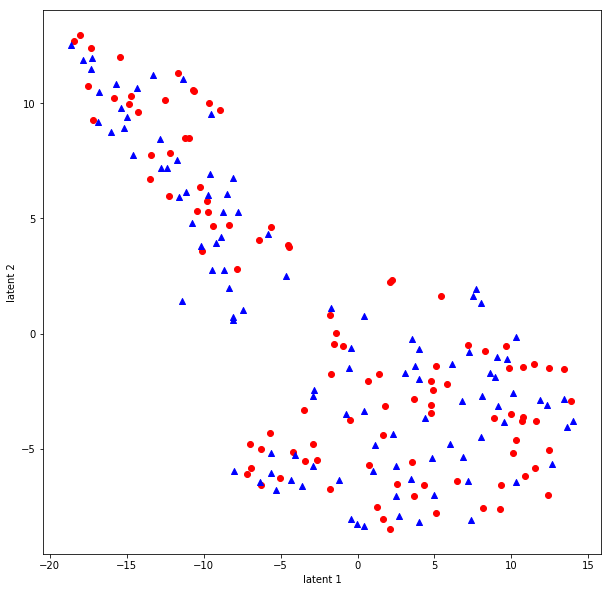

In [42]:
c = ['r', 'b']
m = ['o', '^']

plt.figure(figsize=(10, 10))
plt.scatter(X_embedded2[0:dim3, 0], X_embedded2[0:dim3, 1], c=c[0], marker=m[0])
plt.scatter(X_embedded2[dim3:, 0], X_embedded2[dim3:, 1], c=c[1], marker=m[1])
plt.xlabel('latent 1')
plt.ylabel('latent 2')
plt.show()